# Prédiction de résultats de matchs de foot
## Machine Learning appliqué à la Premier League

## 1. Importation des librairies

In [9]:
import requests
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from dotenv import load_dotenv
import os

## 2. Récupération des données

In [6]:
load_dotenv(r"C:\Users\marse\foot-prediction\.env")
API_KEY = os.getenv("API_KEY")

COMPETITION = "PL"
SAISON = "2023"

url = f"https://api.football-data.org/v4/competitions/{COMPETITION}/matches?season={SAISON}"
headers = {"X-Auth-Token": API_KEY}

response = requests.get(url, headers=headers)
data = response.json()
matches = data["matches"]
print(f"{len(matches)} matchs récupérés")

380 matchs récupérés


## 3. Construction du DataFrame

In [7]:
rows = []
for m in matches:
    if m["status"] != "FINISHED":
        continue
    rows.append({
        "home_team": m["homeTeam"]["name"],
        "away_team": m["awayTeam"]["name"],
        "home_goals": m["score"]["fullTime"]["home"],
        "away_goals": m["score"]["fullTime"]["away"],
        "result": m["score"]["winner"]
    })

df = pd.DataFrame(rows)
df = df.dropna()
print(df.head())
print(f"\nDistribution des résultats :\n{df['result'].value_counts()}")


                   home_team             away_team  home_goals  away_goals  \
0                 Burnley FC    Manchester City FC           0           3   
1                 Arsenal FC  Nottingham Forest FC           2           1   
2            AFC Bournemouth    West Ham United FC           1           1   
3  Brighton & Hove Albion FC         Luton Town FC           4           1   
4                 Everton FC             Fulham FC           0           1   

      result  
0  AWAY_TEAM  
1  HOME_TEAM  
2       DRAW  
3  HOME_TEAM  
4  AWAY_TEAM  

Distribution des résultats :
result
HOME_TEAM    175
AWAY_TEAM    123
DRAW          82
Name: count, dtype: int64


## 4. Feature Engineering

In [8]:
df["home_encoded"] = pd.factorize(df["home_team"])[0]
df["away_encoded"] = pd.factorize(df["away_team"])[0]
df["result_encoded"] = df["result"].map({
    "HOME_TEAM": 0,
    "DRAW": 1,
    "AWAY_TEAM": 2
})

X = df[["home_encoded", "away_encoded"]]
y = df["result_encoded"]

## 5. Entraînement du modèle

In [10]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

## 6. Évaluation du modèle

380 matchs récupérés
                   home_team             away_team  home_goals  away_goals  \
0                 Burnley FC    Manchester City FC           0           3   
1                 Arsenal FC  Nottingham Forest FC           2           1   
2            AFC Bournemouth    West Ham United FC           1           1   
3  Brighton & Hove Albion FC         Luton Town FC           4           1   
4                 Everton FC             Fulham FC           0           1   

      result  
0  AWAY_TEAM  
1  HOME_TEAM  
2       DRAW  
3  HOME_TEAM  
4  AWAY_TEAM  

Distribution des résultats :
result
HOME_TEAM    175
AWAY_TEAM    123
DRAW          82
Name: count, dtype: int64

── Rapport de classification ──
              precision    recall  f1-score   support

    Domicile       0.43      0.65      0.51        31
         Nul       0.29      0.11      0.15        19
   Extérieur       0.41      0.35      0.38        26

    accuracy                           0.41        76
 

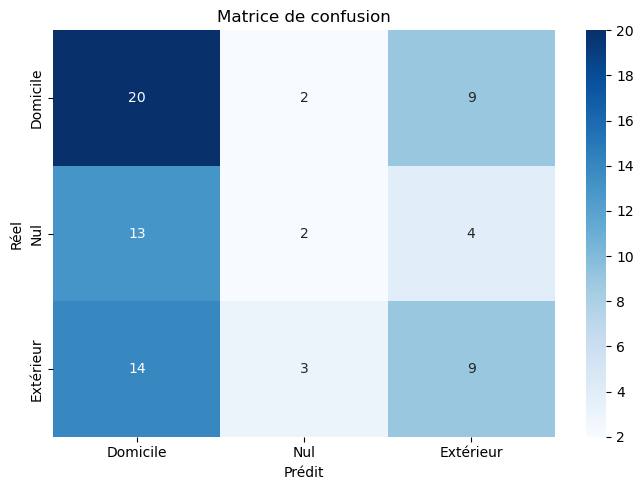

Graphique sauvegardé : confusion_matrix.png


In [10]:
# ============================================================
# PRÉDICTION DE RÉSULTATS DE MATCH DE FOOT - Machine Learning
# ============================================================

import requests
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# ── 1. RÉCUPÉRATION DES DONNÉES ──────────────────────────────

from dotenv import load_dotenv
import os

load_dotenv(r"C:\Users\marse\foot-prediction\.env")
API_KEY = os.getenv("API_KEY")

COMPETITION = "PL"  # Premier League (gratuit)
SAISON = "2023"

url = f"https://api.football-data.org/v4/competitions/{COMPETITION}/matches?season={SAISON}"
headers = {"X-Auth-Token": API_KEY}

response = requests.get(url, headers=headers)
data = response.json()

matches = data["matches"]
print(f"{len(matches)} matchs récupérés")

# ── 2. CONSTRUCTION DU DATAFRAME ─────────────────────────────

rows = []
for m in matches:
    if m["status"] != "FINISHED":
        continue
    rows.append({
        "home_team": m["homeTeam"]["name"],
        "away_team": m["awayTeam"]["name"],
        "home_goals": m["score"]["fullTime"]["home"],
        "away_goals": m["score"]["fullTime"]["away"],
        "result": m["score"]["winner"]  # HOME_TEAM, AWAY_TEAM, DRAW
    })

df = pd.DataFrame(rows)
df = df.dropna()
print(df.head())
print(f"\nDistribution des résultats :\n{df['result'].value_counts()}")

# ── 3. FEATURE ENGINEERING ───────────────────────────────────
# On encode les équipes et on crée des features simples

df["home_encoded"] = pd.factorize(df["home_team"])[0]
df["away_encoded"] = pd.factorize(df["away_team"])[0]
df["result_encoded"] = df["result"].map({
    "HOME_TEAM": 0,
    "DRAW": 1,
    "AWAY_TEAM": 2
})

# Features utilisées pour la prédiction
X = df[["home_encoded", "away_encoded"]]
y = df["result_encoded"]

# ── 4. ENTRAÎNEMENT DU MODÈLE ────────────────────────────────

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# ── 5. ÉVALUATION ────────────────────────────────────────────

y_pred = model.predict(X_test)

print("\n── Rapport de classification ──")
print(classification_report(y_test, y_pred,
      target_names=["Domicile", "Nul", "Extérieur"]))

# Matrice de confusion
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(7, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Domicile", "Nul", "Extérieur"],
            yticklabels=["Domicile", "Nul", "Extérieur"])
plt.title("Matrice de confusion")
plt.ylabel("Réel")
plt.xlabel("Prédit")
plt.tight_layout()
plt.savefig("confusion_matrix.png")
plt.show()
print("Graphique sauvegardé : confusion_matrix.png")